
<hr/>
[**Dhruv Patel**](https://www.kaggle.com/dhruvpatel1057)[](http://)
<hr/>

### Red Wine Quality Dataset - EDA and Classification

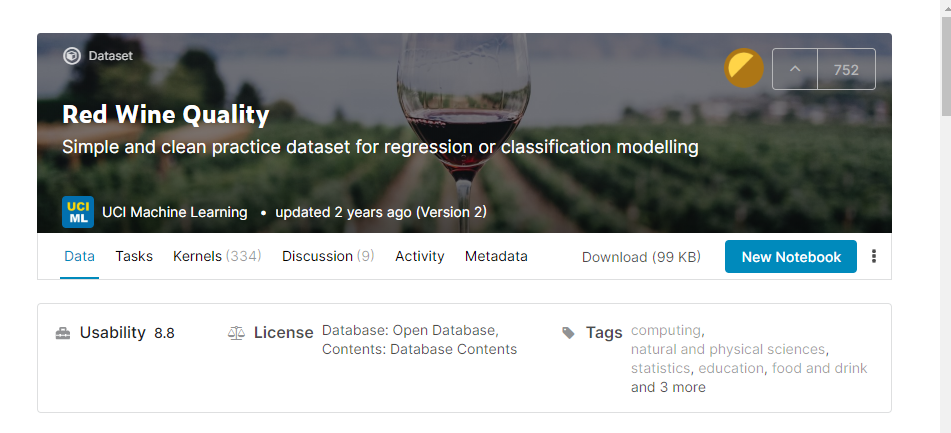

<br>
<br>


#### Table of Contents

<font color=green>
1. [Overview](#1)
1. [Importing Libraries](#2)
1. [Data Visualization](#3)
1. [Data Preprocessing](#4)
1. [Creating Pipelines And Training Models](#5)
1. [Conclusion](#6)
<hr/>



# Lets Get Started


## <span id="1"></span> ** 1. Overview **

Input Variables:
- **fixed acidity: ** most acids involved with wine or fixed or nonvolatile
- **volatile acidity: ** the amount of acetic acid in wine
- **citric acid: ** found in small quantities, citric acid can add 'freshness' and flavor to wines 
- **residual sugar: ** the amount of sugar remaining after fermentation stops
- **chlorides: ** the amount of salt in the wine
- **free sulfur dioxide: ** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- **total sulfur dioxide: ** amount of free and bound forms of S02
- **density: ** the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH: ** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **sulphates: ** a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- **alcohol: ** the percent alcohol content of the wine<br>

Output Variable:
- **quality: ** output variable (based on sensory data, score between 0 and 10)

## <span id="2"></span> ** 2. Importing Libraries**

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### for multiple outputs in cell
from IPython.core.interactiveshell import InteractiveShell  ## getting
InteractiveShell.ast_node_interactivity = "all"


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline



from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score





### Reading the Data

In [178]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [179]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [180]:
data.columns
data.shape


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(1599, 12)

In [181]:
data.groupby("quality")["quality"].count()   ## here is the distribution of the 


quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [182]:
data[data["quality"]==4].shape

(53, 12)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [184]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [185]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## <span id="3"></span> ** 3. Data Visualization**

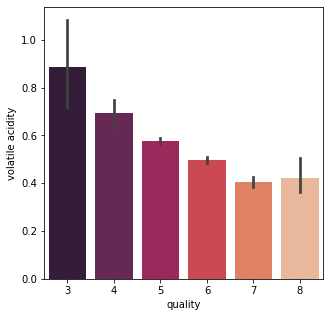

In [186]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="volatile acidity",palette="rocket")

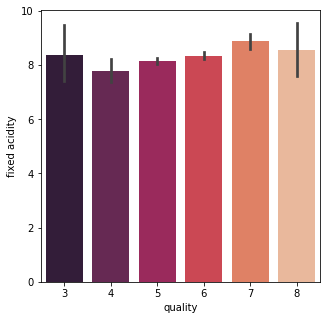

In [187]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="fixed acidity",palette="rocket")

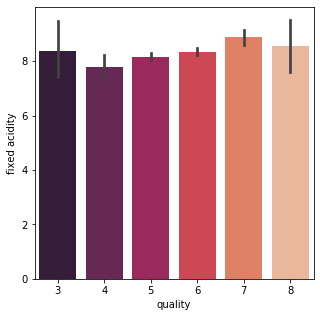

In [188]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="fixed acidity",palette="rocket")

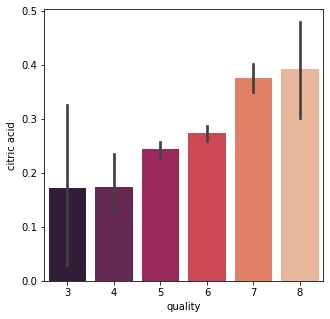

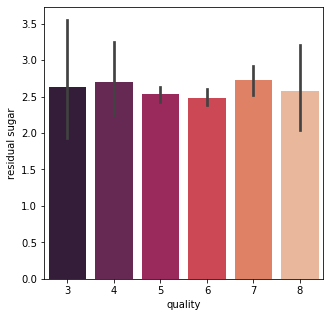

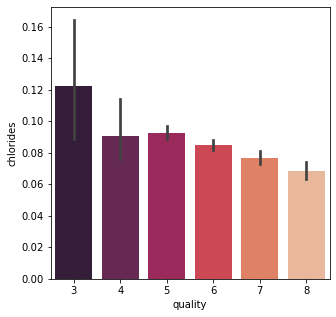

In [189]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="citric acid",palette="rocket")

plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="residual sugar",palette="rocket")

plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="chlorides",palette="rocket")

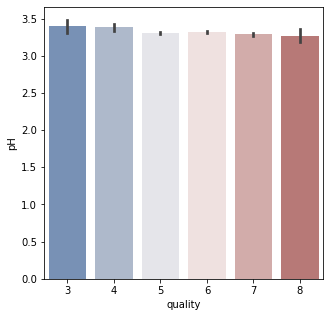

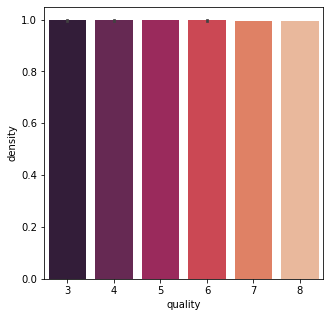

In [190]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="pH",palette="vlag")

plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="density",palette="rocket")


<Figure size 960x800 with 0 Axes>

Text(0.5, 1, 'Correlogram of mtcars')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

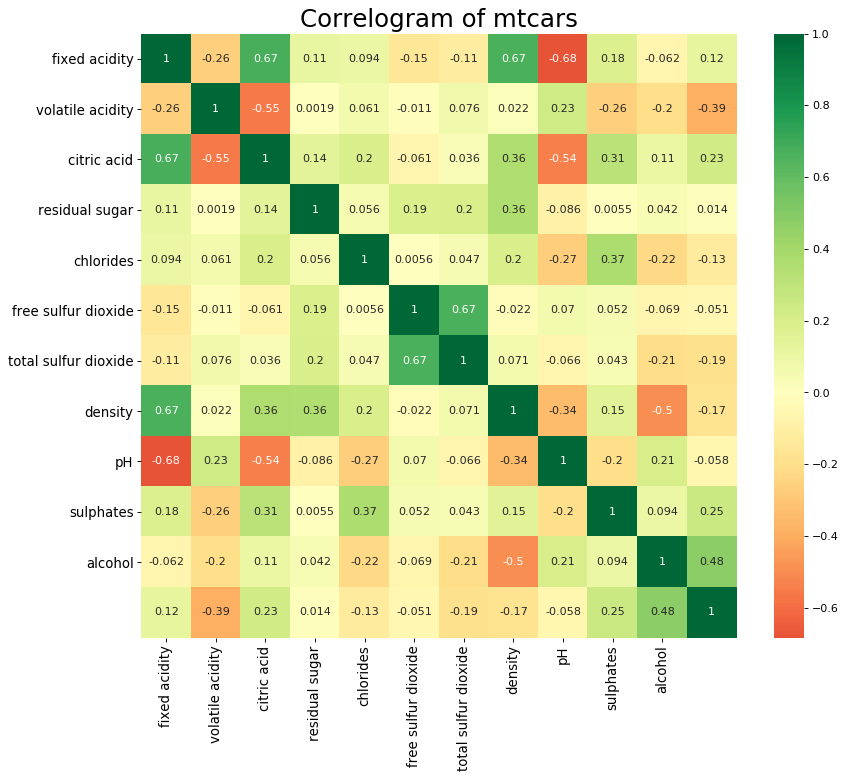

In [191]:

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

<Figure size 360x360 with 0 Axes>

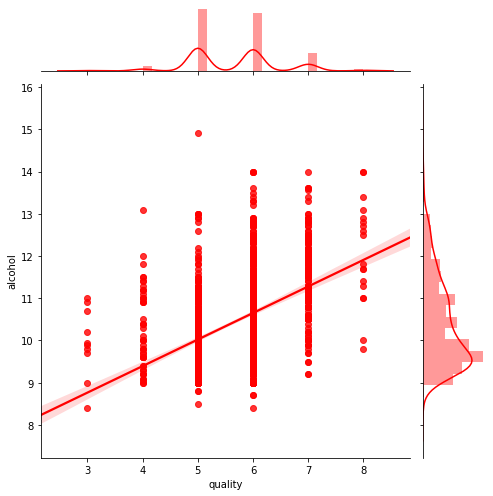

In [192]:
plot = plt.figure(figsize=(5,5))

sns.jointplot(data=data,x="quality",y="alcohol", kind="reg", truncate=False,
                  
                  color="r", height=7)

## <span id="4"></span> ** 4. Preprocessing**

In [194]:
## now it's   time to preprocess our data

data.groupby("quality")["quality"].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [195]:
## we can now divide them into 3 segments : bad, average, good

bins =(2,4,6,8)
names =["bad","average","good"]

data["quality"] = pd.cut(data["quality"],bins=bins,labels=names)

In [196]:
data.groupby("quality")["quality"].count()

quality
bad          63
average    1319
good        217
Name: quality, dtype: int64

In [197]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average


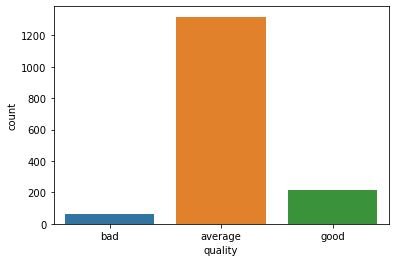

In [198]:
### now we can see  there is average, bad ,and good labels in quality columns

sns.countplot(data["quality"])

In [199]:
le = LabelEncoder()

data["quality"] = le.fit_transform(data["quality"])


In [200]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [201]:
data.groupby("quality")["quality"].count()

quality
0    1319
1      63
2     217
Name: quality, dtype: int64

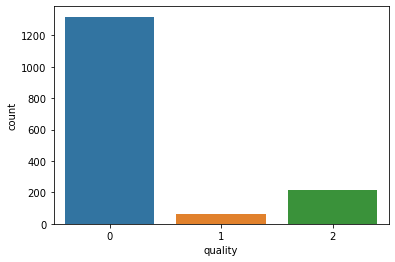

In [202]:
### now we can see  the average, bad ,and good labels in quality columns are encoded into numeric 

sns.countplot(data["quality"])

In [203]:
X=data.drop("quality",axis=1)
y = data["quality"]

In [204]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [205]:
y.value_counts()

0    1319
2     217
1      63
Name: quality, dtype: int64

In [206]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                                train_size=0.8,
                                                                test_size=0.2,
                                                                random_state=0)


## <span id="5"></span> ** 5. Creating Pipelines And Training Models**

In [207]:
scaler = StandardScaler()

model_rf=RandomForestClassifier(n_estimators=100,random_state=0)
model_xgb = XGBClassifier(n_estimators=200,random_state=0)



rf_pipeline =Pipeline(steps=[
    ("sc",scaler),
    ("rf",model_rf)
])

xgb_pipeline = Pipeline(steps=[
    ("sc",scaler),
    ("xgb",model_xgb)
])


parameters_xgb = {'xgb__n_estimators':[i for i in range(100,1000,100)]}

parameters_rf = {'rf__n_estimators':[i for i in range(100,1000,100)]}

In [208]:
cv = GridSearchCV(xgb_pipeline,parameters_xgb,cv=5)


In [209]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
     

In [210]:
preds = cv.predict(X_valid)

In [211]:
print(classification_report(y_valid,preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       277
           1       0.00      0.00      0.00        13
           2       0.58      0.73      0.65        30

    accuracy                           0.88       320
   macro avg       0.50      0.56      0.53       320
weighted avg       0.85      0.88      0.87       320



In [212]:
print(confusion_matrix(y_valid,preds))

[[259   2  16]
 [ 13   0   0]
 [  8   0  22]]


In [213]:
rf_cv = GridSearchCV(rf_pipeline,parameters_rf,cv=5)


In [214]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                   

In [215]:
rf_preds = rf_cv.predict(X_valid)

print(confusion_matrix(y_valid,rf_preds))

[[267   0  10]
 [ 13   0   0]
 [ 13   0  17]]


In [216]:
print(classification_report(y_valid,rf_preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       277
           1       0.00      0.00      0.00        13
           2       0.63      0.57      0.60        30

    accuracy                           0.89       320
   macro avg       0.51      0.51      0.51       320
weighted avg       0.85      0.89      0.87       320



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [217]:
rf_cv.score(X_valid,y_valid)

0.8875

In [218]:
cv.score(X_valid,y_valid)

0.878125

In [219]:

dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 0)


In [220]:
dt_pipeline = Pipeline(steps=[
    ("sc",scaler),
    ("dt",dt_classifier)
])


params_dt = {"dt__criterion":["gini","entropy"],
          "dt__max_features":[3,4,5,6,7,8,9,10],
          "dt__max_leaf_nodes":[200,300,400,500]
         }

In [221]:
dt_cv = GridSearchCV(dt_pipeline,params_dt,cv=5)


In [222]:
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=6,
                                                               max_leaf_nodes=400,
                                                               min_impurity_decrease=0.0,
                                              

In [223]:
dt_cv.best_params_

{'dt__criterion': 'entropy', 'dt__max_features': 9, 'dt__max_leaf_nodes': 200}

In [224]:
dt_cv.score(X_valid,y_valid)

0.84375

In [225]:
dt_preds=dt_cv.predict(X_valid)

In [226]:
print(classification_report(y_valid,dt_preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       277
           1       0.30      0.23      0.26        13
           2       0.44      0.57      0.49        30

    accuracy                           0.84       320
   macro avg       0.55      0.57      0.56       320
weighted avg       0.85      0.84      0.85       320



In [227]:
print(confusion_matrix(y_valid,dt_preds))

[[250   6  21]
 [  9   3   1]
 [ 12   1  17]]


## <span id="6"></span> ** 6. Conclusion**

Thus in this kernel we built several pipelines using sklearn and used models like XGBoostClassifier,RandomForest,and DecisionTreeClassifier for classifying the wine quality in our pre-defined segments (good,average,bad)
There's still lot more we can do with our models and data like feature engineering and fine tuning the models adding some more parameters.
I will keep updating this kernel frequently as possible



<b><font color="red">Please <b><font color="green">UPVOTE </font></b> this notebook if you like it, this keeps me motivated for creating more such notebooks ,thank you
